In [17]:
cd /mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Banff_BIRS_TDA_workshop_data/data/day4

/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Banff_BIRS_TDA_workshop_data/data/day4


In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

import glob

import pandas as pd

import seaborn 

In [331]:
fs = glob.glob('*_pdxy.csv')

In [282]:
rel_fs = [f for f in pd_fs if 'rel' in f]

In [332]:
len(fs)

1015

In [9]:
lang_fs = [f for f in pd_fs if 'lang' in f]

In [11]:
len(lang_fs)

182

In [12]:
rest_fs = [f for f in pd_fs if 'rest' in f]

In [20]:
len(rest_fs)

10

In [ ]:
op

In [25]:
subs_file = 'HCP_900_subslist.txt'
subs = [s[:-1] for s in open(subs_file, 'r').readlines()]

fs = glob.glob('*_pdxy.csv')

len(fs)

subs_to_do = subs[:10]

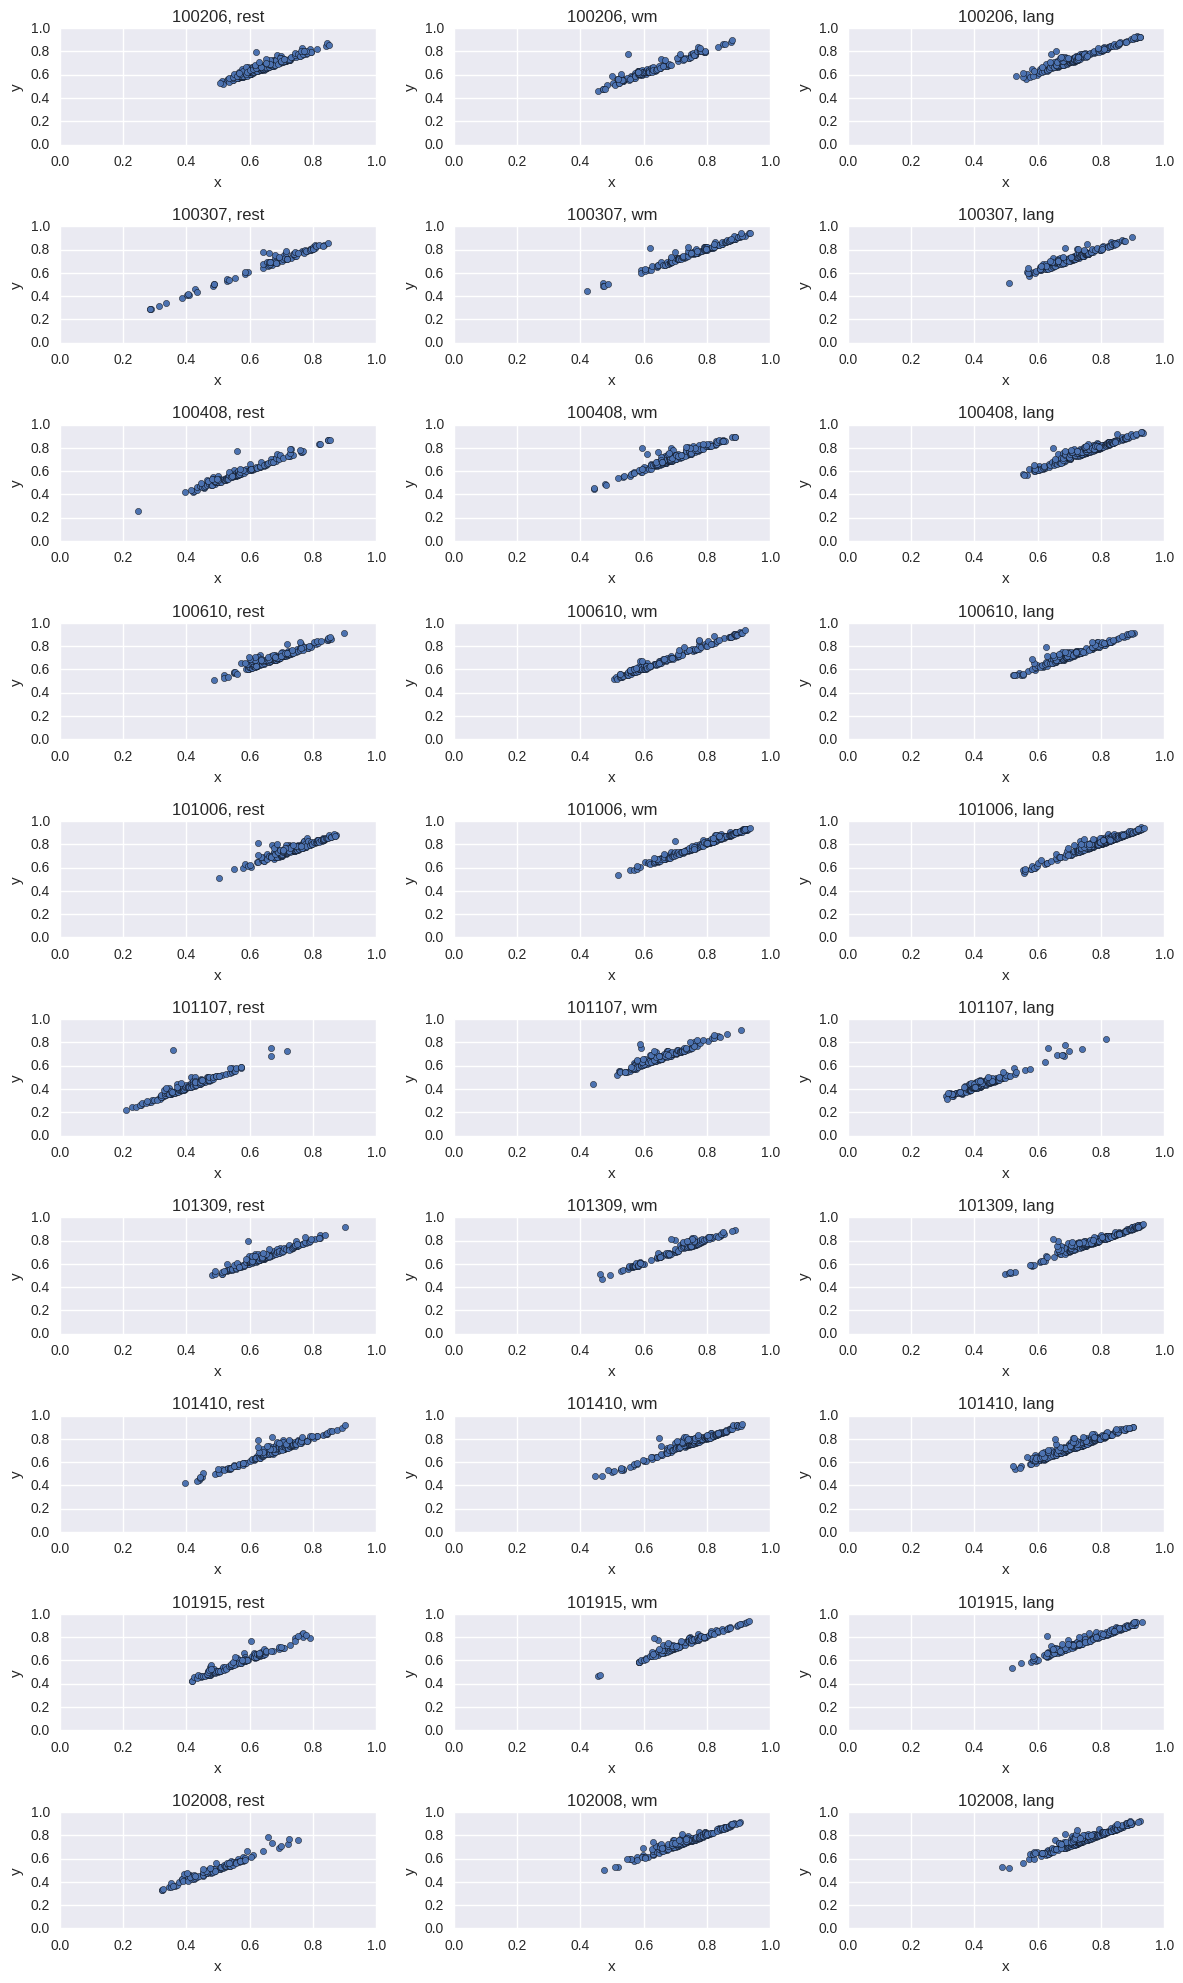

In [88]:
fig, ax = plt.subplots(ncols=3,nrows=10,figsize=(12,20))

rest_dfs,wm_dfs,lang_dfs = {},{},{}

for sub_it,sub in enumerate(subs_to_do):
    
    task = 'rest'
    f = [f for f in fs if sub in f and task in f][0]
    a = ax[sub_it][0]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    df.plot(kind='scatter', x='x', y='y',ax=a,xlim=[0,1],ylim=[0,1])
    a.set_title('%s, %s' %(sub,task))
    rest_dfs[sub,task] = df
    
    task = 'wm'
    f = [f for f in fs if sub in f and task in f][0]
    a = ax[sub_it][1] # a = ax.ravel()[sub_it][1]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    df.plot(kind='scatter', x='x', y='y',ax=a,xlim=[0,1],ylim=[0,1])
    a.set_title('%s, %s' %(sub,task))
    wm_dfs[sub,task] = df
    
    task = 'lang'
    f = [f for f in fs if sub in f and task in f][0]
    a = ax[sub_it][2] # a = ax.ravel()[sub_it][1]    
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    df.plot(kind='scatter', x='x', y='y',ax=a,xlim=[0,1],ylim=[0,1])
    a.set_title('%s, %s' %(sub,task))
    lang_dfs[sub,task] = df
    
plt.tight_layout()

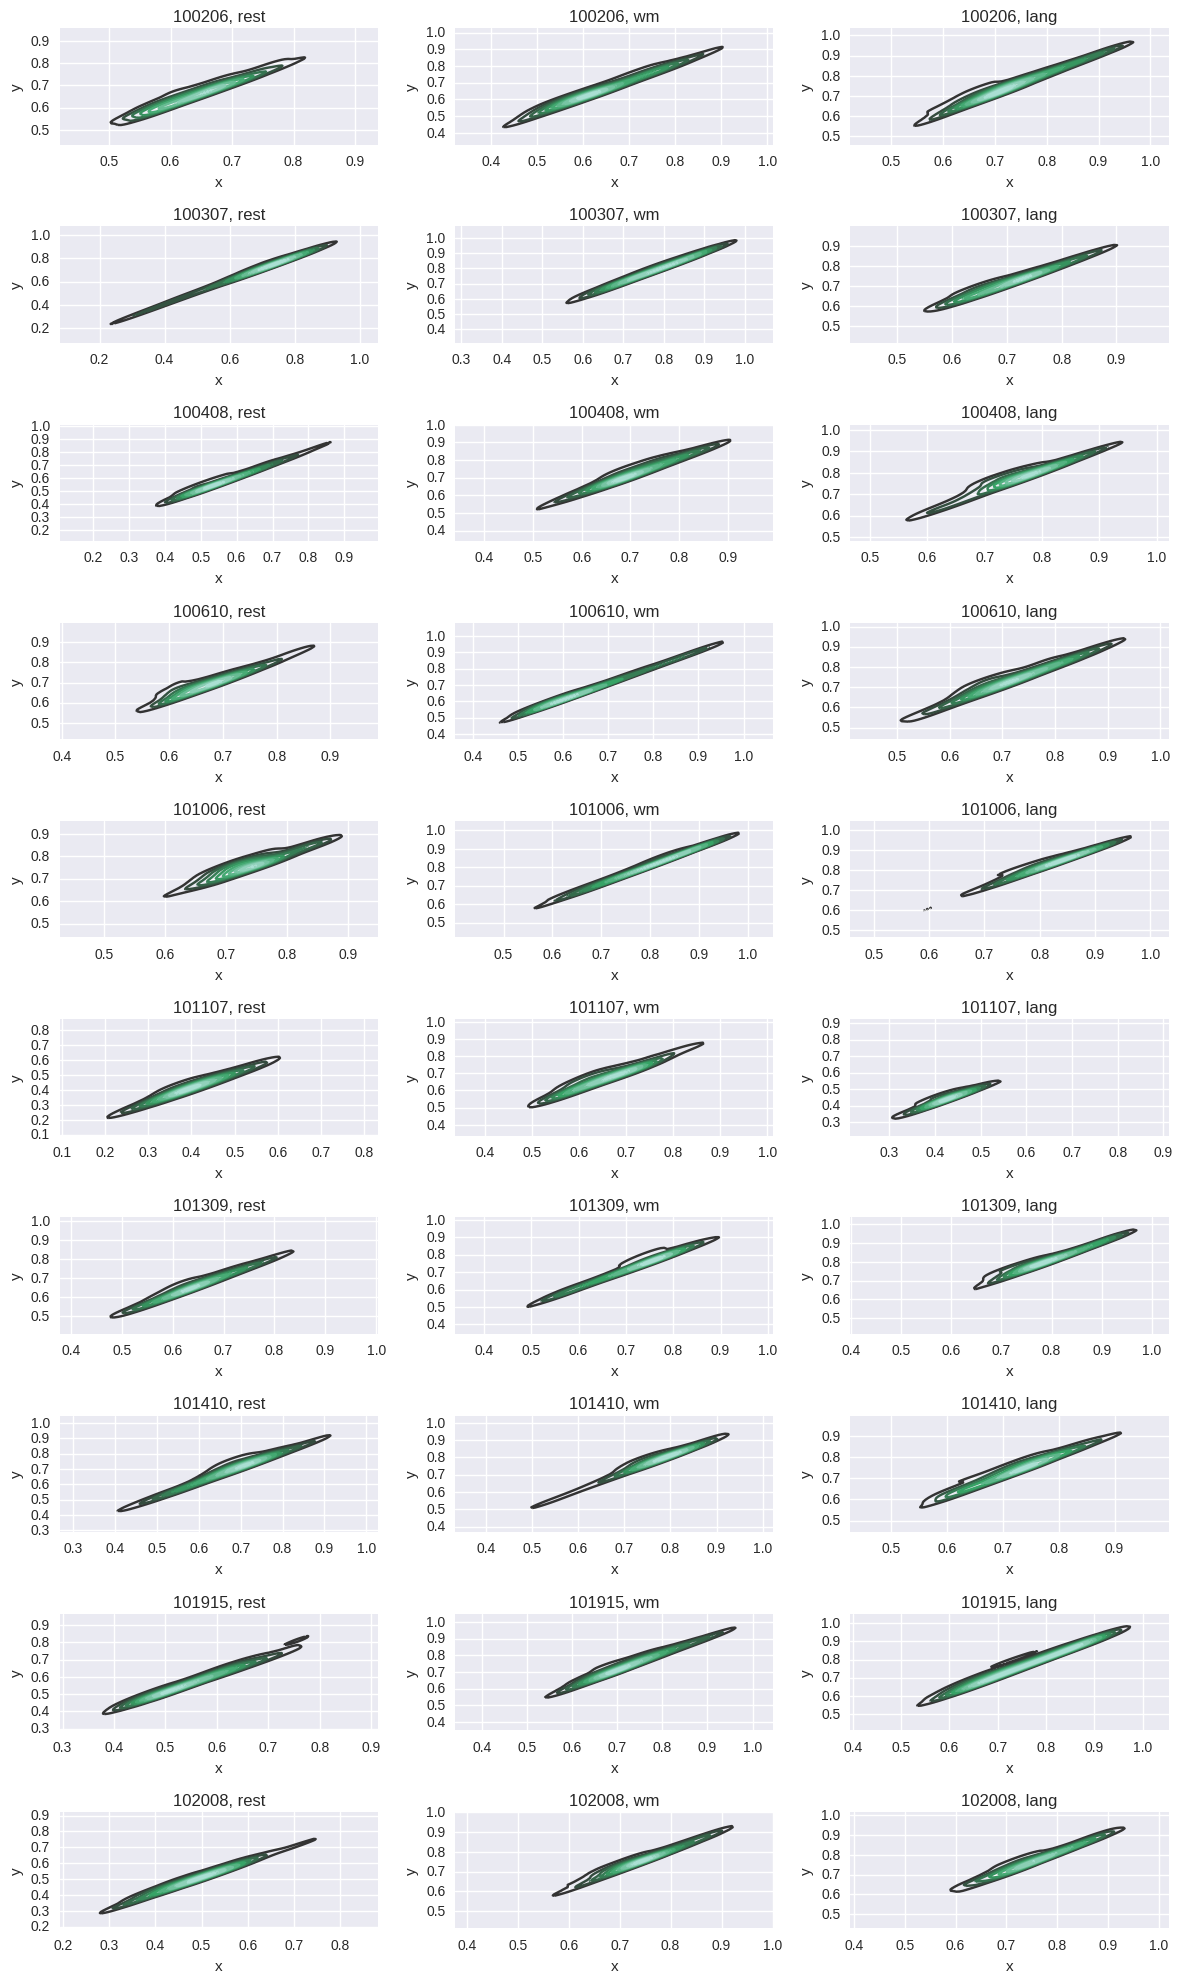

In [113]:
fig, ax = plt.subplots(ncols=3,nrows=10,figsize=(12,20))

rest_dfs,wm_dfs,lang_dfs = {},{},{}

for sub_it,sub in enumerate(subs_to_do):
    
    task = 'rest'
    f = [f for f in fs if sub in f and task in f][0]
    a = ax[sub_it][0]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    sns.kdeplot(df['x'],df['y'],ax=a,xlim=[0,1],ylim=[0,1])
    a.set_title('%s, %s' %(sub,task))
    rest_dfs[sub,task] = df
    
    task = 'wm'
    f = [f for f in fs if sub in f and task in f][0]
    a = ax[sub_it][1] # a = ax.ravel()[sub_it][1]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    sns.kdeplot(df['x'],df['y'],ax=a,xlim=[0,1],ylim=[0,1])
    a.set_title('%s, %s' %(sub,task))
    wm_dfs[sub,task] = df
    
    task = 'lang'
    f = [f for f in fs if sub in f and task in f][0]
    a = ax[sub_it][2] # a = ax.ravel()[sub_it][1]    
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    sns.kdeplot(df['x'],df['y'],ax=a,xlim=[0,1],ylim=[0,1])
    a.set_title('%s, %s' %(sub,task))
    lang_dfs[sub,task] = df
    
plt.tight_layout()

mean probably isn't right...'

In [132]:
lang_dfs_cat = pd.concat(lang_dfs)
lang_dfs_cat.index.names = ['sub', 'task', 'idx']
mn_lang_dfs_cat = lang_dfs_cat.unstack('task').unstack('idx').mean().unstack('task').unstack('idx').T.ix['lang']

wm_dfs_cat = pd.concat(wm_dfs)
wm_dfs_cat.index.names = ['sub', 'task', 'idx']
mn_wm_dfs_cat = wm_dfs_cat.unstack('task').unstack('idx').mean().unstack('task').unstack('idx').T.ix['wm']

rest_dfs_cat = pd.concat(rest_dfs)
rest_dfs_cat.index.names = ['sub', 'task', 'idx']
mn_rest_dfs_cat = rest_dfs_cat.unstack('task').unstack('idx').mean().unstack('task').unstack('idx').T.ix['rest']

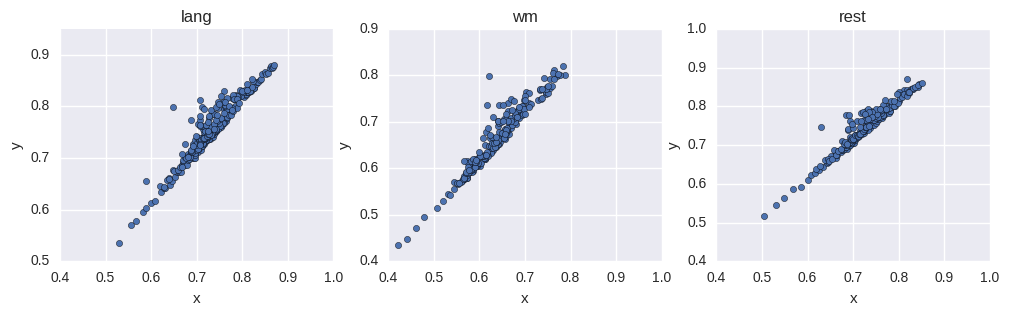

In [152]:
fig, ax = plt.subplots(ncols=3,figsize=(12,3))


mn_lang_dfs_cat.plot(kind='scatter', x='x', y='y',ax=ax[0],xlim=[0.4,1.])
mn_rest_dfs_cat.plot(kind='scatter', x='x', y='y',ax=ax[1],xlim=[0.4,1])
mn_wm_dfs_cat.plot(kind='scatter', x='x', y='y',ax=ax[2],xlim=[0.4,1])


ax[0].set_title('lang')
ax[1].set_title('wm')
ax[2].set_title('rest')


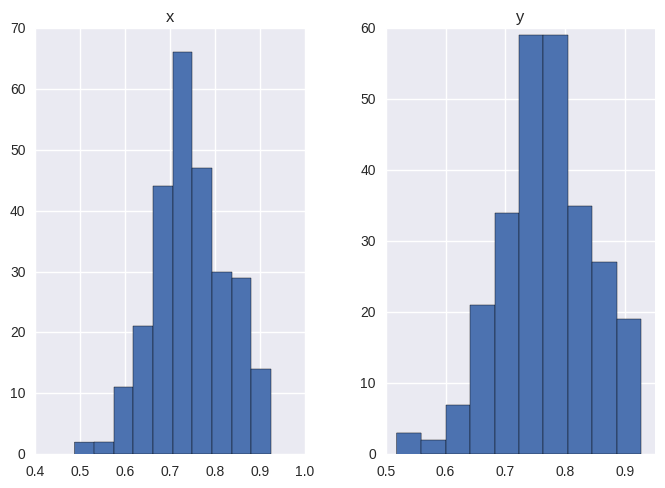

In [156]:
blah = df.hist()

In [157]:
blah

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff429b67410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff4315c5c10>]], dtype=object)

In [153]:
from scipy.stats import kde

In [158]:
from scipy.stats import histogram

In [164]:
import numpy as np

In [187]:
np.histogram2d?

In [284]:
_bins = np.arange(0,1,0.01)

rest_hists,wm_hists,lang_hists,rel_hists = {},{},{},{}

rest_allxys,wm_allxys,lang_allxys,rel_allxys = [],[],[],[]


for sub_it,sub in enumerate(subs_to_do):
    
    task = 'rest'
    f = [f for f in fs if sub in f and task in f][0]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    _weights,_xbins,_ybins = np.histogram2d(df['x'],df['y'],bins=[_bins,_bins])
    rest_hists[sub] = _weights
    rest_allxys.append(df[['x', 'y']].values)
    
    task = 'wm'
    f = [f for f in fs if sub in f and task in f][0]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    _weights,_xbins,_ybins = np.histogram2d(df['x'],df['y'],bins=[_bins,_bins])
    wm_hists[sub] = _weights
    wm_allxys.append(df[['x', 'y']].values)
    
    task = 'lang'
    f = [f for f in fs if sub in f and task in f][0]
    df = pd.read_csv(f,sep=',',header=None)
    df.columns = ['x', 'y']    
    _weights,_xbins,_ybins = np.histogram2d(df['x'],df['y'],bins=[_bins,_bins])
    lang_hists[sub] = _weights
    lang_allxys.append(df[['x', 'y']].values)

    #task = 'rel'
    #f = [f for f in fs if sub in f and task in f][0]
    #df = pd.read_csv(f,sep=',',header=None)
    #df.columns = ['x', 'y']    
    #_weights,_xbins,_ybins = np.histogram2d(df['x'],df['y'],bins=[_bins,_bins])
    #rel_hists[sub] = _weights
    #rel_allxys.append(df[['x', 'y']].values)
    
    
mn_rest_hists = np.zeros_like(rest_hists.values()[0])
for k,v in rest_hists.items():  mn_rest_hists+=v
mn_rest_hists/= len(rest_hists)

mn_wm_hists = np.zeros_like(wm_hists.values()[0])
for k,v in wm_hists.items():  mn_wm_hists+=v
mn_wm_hists/= len(wm_hists)

mn_lang_hists = np.zeros_like(lang_hists.values()[0])
for k,v in lang_hists.items():  mn_lang_hists+=v
mn_lang_hists/= len(lang_hists)


#mn_rel_hists = np.zeros_like(rel_hists.values()[0])
#for k,v in rel_hists.items():  mn_rel_hists+=v
#mn_rel_hists/= len(rel_hists)


df_lang_allxys = pd.DataFrame(np.concatenate(lang_allxys))
df_lang_allxys.columns = ['x', 'y']

df_rest_allxys = pd.DataFrame(np.concatenate(rest_allxys))
df_rest_allxys.columns = ['x', 'y']

df_wm_allxys = pd.DataFrame(np.concatenate(wm_allxys))
df_wm_allxys.columns = ['x', 'y']

In [287]:
rest_sub_wm_hists,rest_sub_lang_hists,wm_sub_lang_hists ={},{},{}

for sub in subs_to_do:
    rest_sub_wm_hists[sub] = rest_hists[sub] - wm_hists[sub]
    rest_sub_lang_hists[sub] = rest_hists[sub] - lang_hists[sub]
    wm_sub_lang_hists[sub] = wm_hists[sub] - lang_hists[sub]
    

In [291]:
from scipy.stats import ttest_rel

In [295]:
rest_hists_arr = np.array(rest_hists.values())
wm_hists_arr = np.array(wm_hists.values())
lang_hists_arr = np.array(lang_hists.values())

In [293]:
rest_hists_arr.shape

(10, 99, 99)

In [298]:
ts,ps = ttest_rel(rest_hists_arr,wm_hists_arr, axis=0)

/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


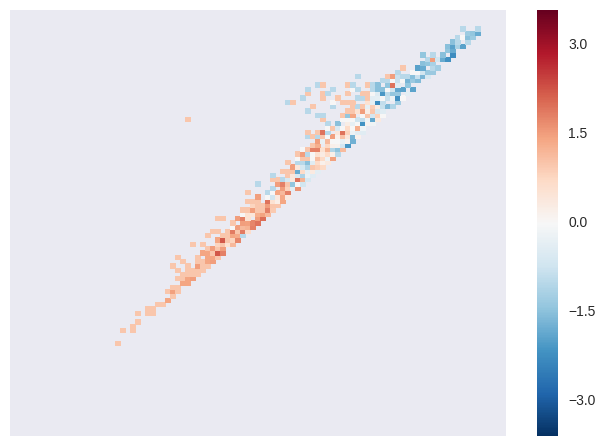

In [311]:
psft = np.flipud(ps.T)
tsft = np.flipud(ts.T)
sns.heatmap(tsft,xticklabels='',yticklabels='',mask=psft<0.05)

In [297]:
blah[0].shape

(99, 99)

In [ ]:
df_rel_allxyzs

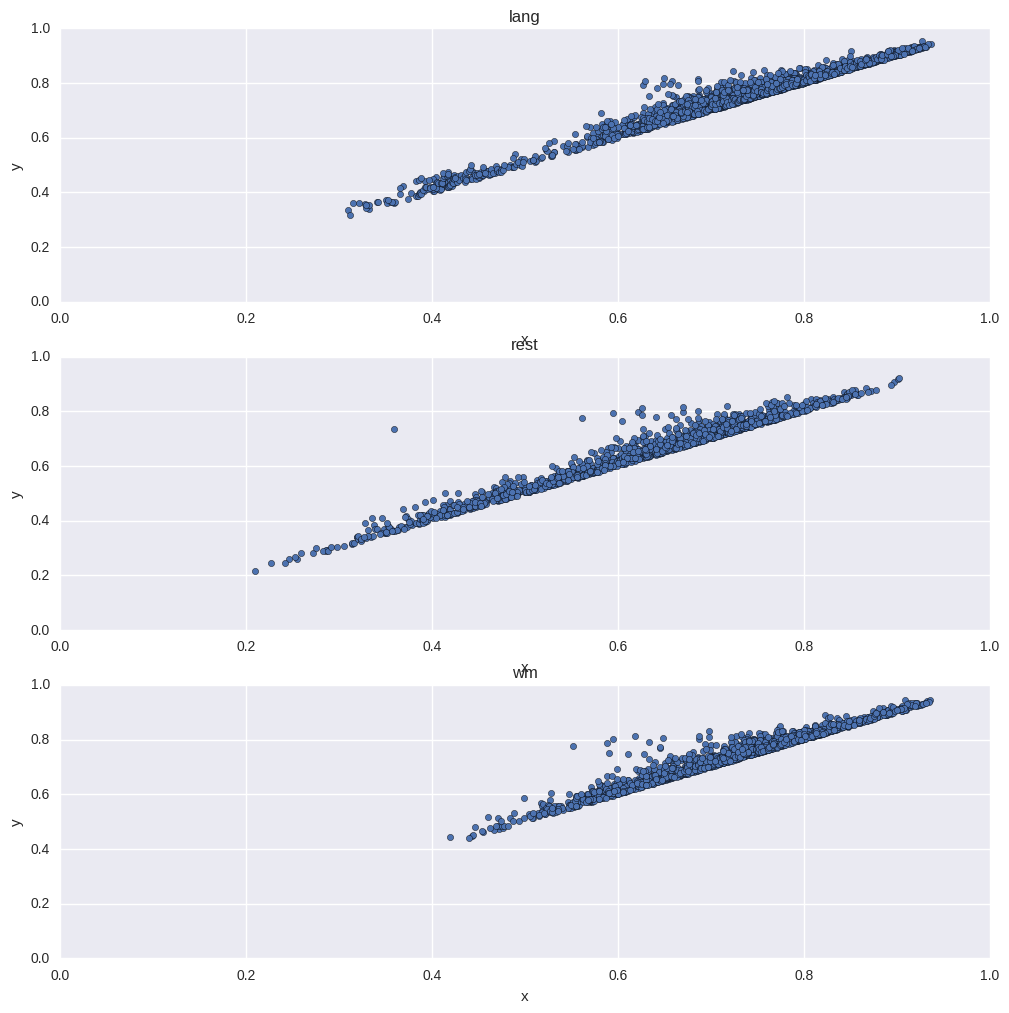

In [278]:
fig, ax = plt.subplots(nrows=3,figsize=(12,12))

df_lang_allxys.plot(kind='scatter', x='x', y='y',ax=ax[0], title='lang',xlim=[0,1],ylim=[0,1])
df_rest_allxys.plot(kind='scatter', x='x', y='y',ax=ax[1], title='rest',xlim=[0,1],ylim=[0,1])
df_wm_allxys.plot(kind='scatter', x='x', y='y',ax=ax[2],title='wm',xlim=[0,1], ylim=[0,1])


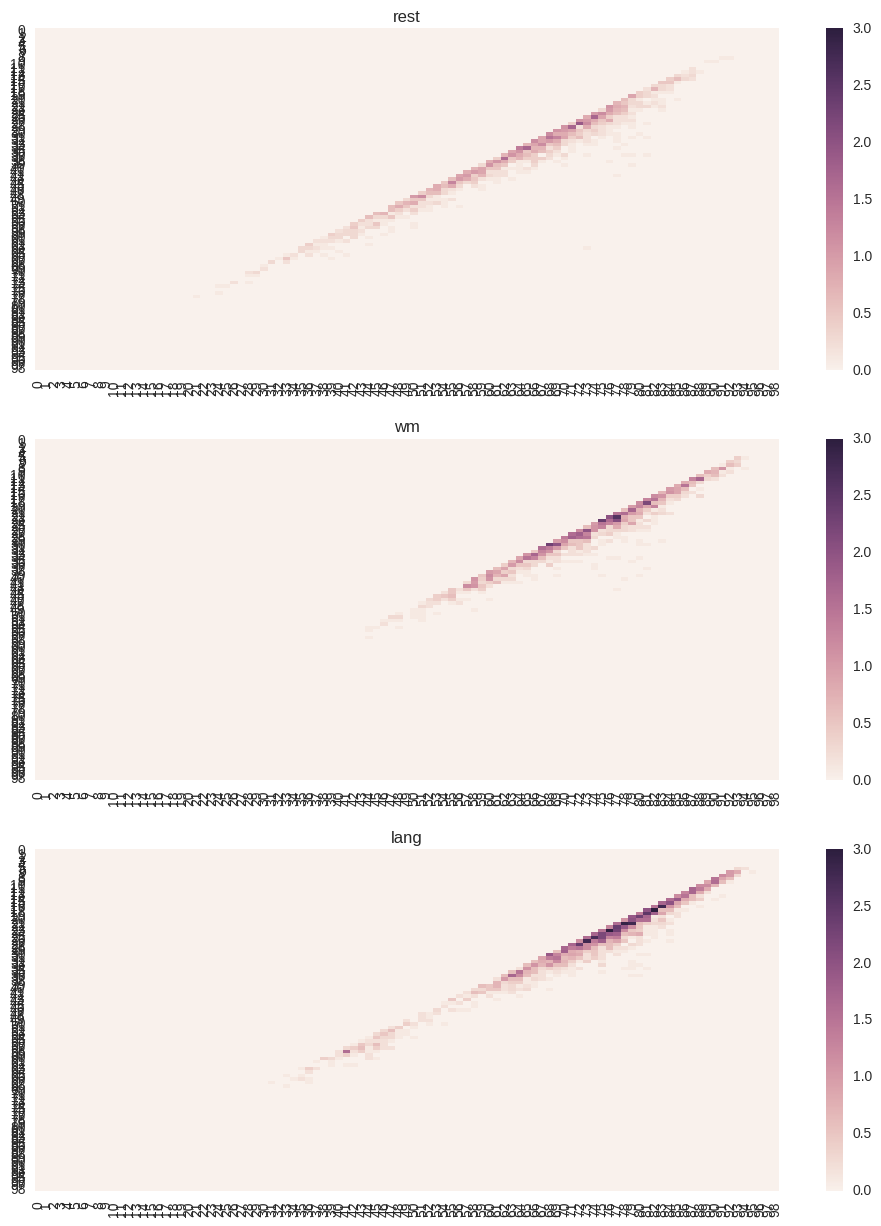

In [234]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(12,15))

a = ax[0]
a.set_title('rest')
sns.heatmap(np.flipud(mn_rest_hists),ax=a,vmin=0,vmax=3)

a = ax[1]
a.set_title('wm')
sns.heatmap(np.flipud(mn_wm_hists),ax=a,vmin=0,vmax=3)

a = ax[2]
a.set_title('lang')
sns.heatmap(np.flipud(mn_lang_hists),ax=a,vmin=0,vmax=3)

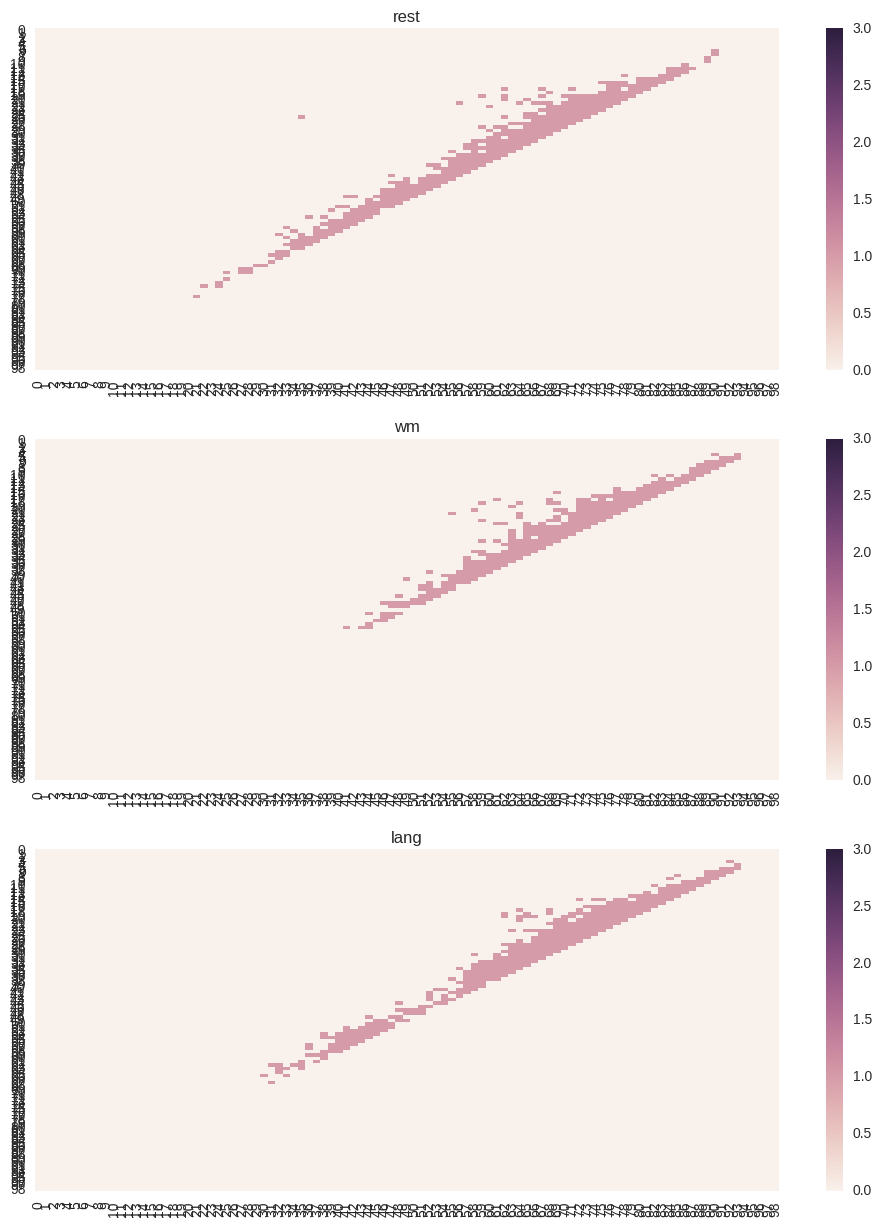

In [322]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(12,15))

a = ax[0]
a.set_title('rest')
sns.heatmap(np.flipud(mn_rest_hists.T>0),ax=a,vmin=0,vmax=3)

a = ax[1]
a.set_title('wm')
sns.heatmap(np.flipud(mn_wm_hists.T>0),ax=a,vmin=0,vmax=3)

a = ax[2]
a.set_title('lang')
sns.heatmap(np.flipud(mn_lang_hists.T>0),ax=a,vmin=0,vmax=3)

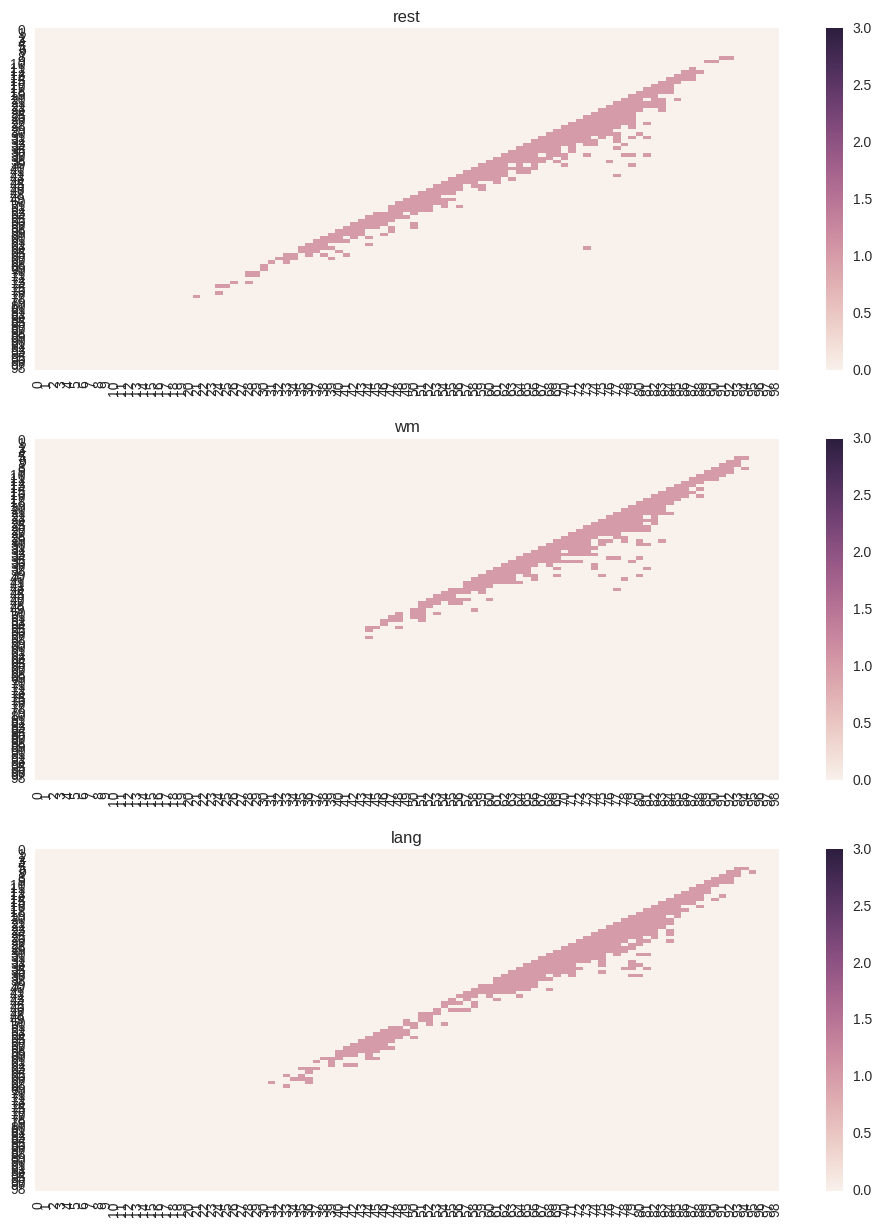

In [237]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(12,15))

a = ax[0]
a.set_title('rest')
sns.heatmap(np.flipud(mn_rest_hists.T>0),ax=a,vmin=0,vmax=3)

a = ax[1]
a.set_title('wm')
sns.heatmap(np.flipud(mn_wm_hists.T>0),ax=a,vmin=0,vmax=3)

a = ax[2]
a.set_title('lang')
sns.heatmap(np.flipud(mn_lang_hists.T>0),ax=a,vmin=0,vmax=3)

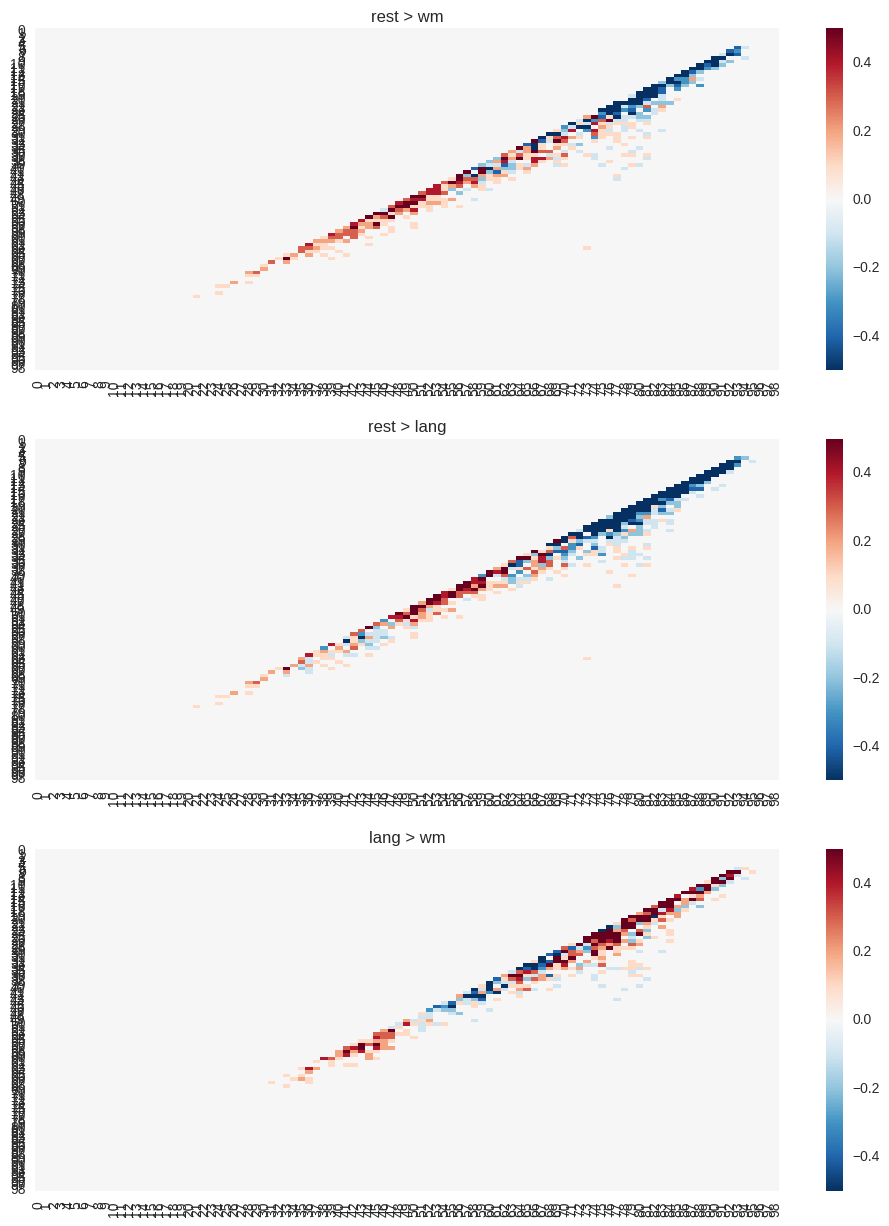

In [240]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(12,15))

a = ax[0]
a.set_title('rest > wm')
sns.heatmap(np.flipud(mn_rest_hists - mn_wm_hists),ax=a,vmin=-0.5,vmax=0.5)

a = ax[1]
a.set_title('rest > lang')
sns.heatmap(np.flipud(mn_rest_hists - mn_lang_hists),ax=a,vmin=-0.5,vmax=0.5)

a = ax[2]
a.set_title('lang > wm')
sns.heatmap(np.flipud(mn_lang_hists - mn_wm_hists),ax=a,vmin=-0.5,vmax=0.5)#,vmin=0,vmax=3)


subject-level differences:
    

In [ ]:

 ....        ..                 ...................................................................                    ........................................................................................................................      

In [ ]:
;''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''';;;;;;;;;;

---

In [312]:
import itertools

In [313]:
task = 'lang'
f = [f for f in fs if sub in f and task in f][0]
df = pd.read_csv(f,sep=',',header=None)
df.columns = ['x', 'y']    
_weights,_xbins,_ybins = np.histogram2d(df['x'],df['y'],bins=[_bins,_bins])
lang_hists[sub] = _weights
lang_allxys.append(df[['x', 'y']].values)

In [366]:
def pd_kernel(pd_x,pd_y,smoothing_param=1.,num_points=10.):
             
    t = smooothing_param

    pd_xmax = pd_x.max()
    pd_xmin = pd_x.min()

    pd_ymax = pd_y.max()
    pd_ymin = pd_y.min()

    pd_xrange = pd_xmax - pd_xmin
    pd_yrange = pd_ymax - pd_ymin

    grid_xmax = pd_xmax + pd_xrange/3.
    grid_xmin = pd_xmin - pd_xrange/3.

    grid_ymax = pd_ymax + pd_yrange/3.
    grid_ymin = pd_ymin - pd_yrange/3.
   
    grid_xnums = np.linspace(grid_xmin,grid_xmax,10)
    grid_ynums = np.linspace(grid_ymin,grid_ymax,10)

    grid_x,grid_y = np.meshgrid(grid_xnums,grid_ynums)

    #itertools list(itertools.product(grid_xnums,grid_ynums))

    nx,ny = grid_x.shape

    n_pdx = pd_x.shape[0]

    u = np.zeros_like(grid_x)
    for x_it in range(nx):
        for y_it in range(ny):
            gx = grid_x[x_it,y_it]
            gy = grid_y[x_it,y_it]

            asum = 0
            for pd_it in range(n_pdx):
                _pdx = pd_x[pd_it]
                _pdy = pd_y[pd_it]
    
                asum+= np.exp(-(abs(gx-_pdx)**2)/4.*t) - np.exp(-(abs(gx-_pdx)**2)/4.*t)

            u[x_it,y_it] = 1./(4.*np.pi*t) * asum
    
    
    return u
             

---

In [3]:
from sklearn.covariance import GraphLassoCV
estimator = GraphLassoCV()

In [4]:
cd /mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Banff_BIRS_TDA_workshop_data/data/day4/

/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Banff_BIRS_TDA_workshop_data/data/day4


In [22]:
f = 'rfMRI_REST1_LR_Atlas_Gordon333_100307.ptseries.nii'

In [23]:
import nibabel as nib

In [24]:
img = nib.gifti.giftiio.read(f)

/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: giftiio.read function deprecated. Use nibabel.load() instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [25]:
import numpy as np

In [26]:
dat = np.squeeze(img.get_data())

In [10]:
estimator = GraphLassoCV()
estimator.fit(dat)

/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/numpy/linalg/linalg.py:1712: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/sklearn/covariance/graph_lasso_.py:230: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/home/jgriffiths/Software/anaconda2/envs/jupyter_release/lib/python2.7/site-packages/sklearn/covariance/graph_lasso_.py:232: RuntimeWarning: invalid value encountered in multiply
  * coefs)


KeyboardInterrupt: 

In [11]:
import seaborn as sns
%matplotlib inline

In [ ]:
sns.heatmap(estimator.covariance_,xticklabels='',yticklabels='')#,vmin=-1,vmax=1)

In [40]:
np.corrcoef(dat.T).shape

(352, 352)

(-0.5, 351.5, 351.5, -0.5)

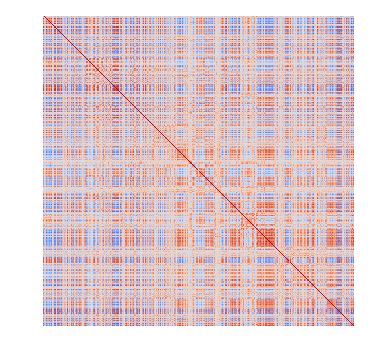

In [41]:
plt.imshow(np.corrcoef(dat.T),vmin=-1,vmax=1,interpolation='nearest', cmap='coolwarm')
plt.axis('off')

(-0.5, 351.5, 351.5, -0.5)

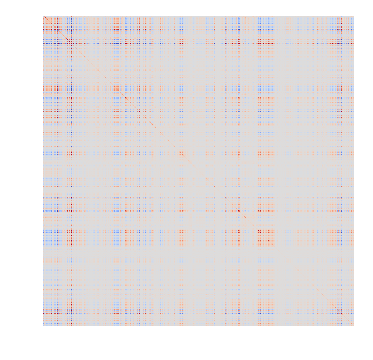

In [49]:
plt.imshow(np.cov(dat.T),vmin=-50000,vmax=50000,interpolation='nearest', cmap='coolwarm')
plt.axis('off')

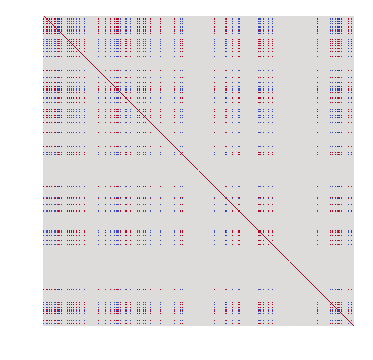

In [36]:
plt.imshow(estimator.covariance_,interpolation='nearest',cmap='coolwarm', vmin=-1,vmax=1)
plt.axis('off');# figsize=(12,12))

In [54]:
estimator.precision_.min()

-5.433351560307428e-06

In [62]:
estimator.precision_.max()

0.0016017280218844118

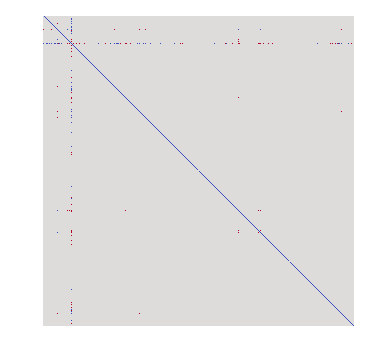

In [79]:
plt.imshow(-estimator.precision_,interpolation='nearest',cmap='coolwarm', vmin=-5E-15,vmax=5E-15)
plt.axis('off');# figsize=(12,12))a

In [81]:
estimator.precision_.min()

-5.433351560307428e-06

In [82]:
estimator.precision_.max()

0.0016017280218844118

In [83]:
import pandas as pd

In [ ]:
pd.DataFrame(estimator.precision_).hist(bins=50)

In [19]:
# %load https://gist.githubusercontent.com/fabianp/9396204419c7b638d38f/raw/f8e31d411d8777354c4000ed98f0e41da986017e/partial_corr.py
"""
Partial Correlation in Python (clone of Matlab's partialcorr)

This uses the linear regression approach to compute the partial 
correlation (might be slow for a huge number of variables). The 
algorithm is detailed here:

    http://en.wikipedia.org/wiki/Partial_correlation#Using_linear_regression

Taking X and Y two variables of interest and Z the matrix with all the variable minus {X, Y},
the algorithm can be summarized as

    1) perform a normal linear least-squares regression with X as the target and Z as the predictor
    2) calculate the residuals in Step #1
    3) perform a normal linear least-squares regression with Y as the target and Z as the predictor
    4) calculate the residuals in Step #3
    5) calculate the correlation coefficient between the residuals from Steps #2 and #4; 

    The result is the partial correlation between X and Y while controlling for the effect of Z


Date: Nov 2014
Author: Fabian Pedregosa-Izquierdo, f@bianp.net
Testing: Valentina Borghesani, valentinaborghesani@gmail.com
"""

import numpy as np
from scipy import stats, linalg

def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.


    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable


    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr

In [14]:
dat.shape

(1200, 352)

In [27]:
_pcorr = partial_corr(dat)

In [16]:
_pcorr.shape

NameError: name '_pcorr' is not defined

In [ ]:
sns.heatmap(_pcorr, xticklabels='',yticklabels='')